In [21]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t, norm
import matplotlib.pyplot as plt

In [22]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## The t-test

The health guideline for lead in drinking water is a concentration of not more than 15 parts per billion (ppb).

Five independent samples from a reservoir average 15.6 ppb. Is this sufficient evidence to conclude that the concentration $\mu$ in the reservoir is above the standard of 15 ppb?

Recall our model for measurements:

$measurement = \mu + measurement~error$

So it may be that the concentration $\mu$ is below 15 ppb, but measurement error results in an average of 15.6 ppb.

$H_0: \mu = 15~ppb ~~~~~ H_A: \mu > 15~ppb$

We can try a z-test for the average of the measurmenets:

$$z = \frac{observed~average - expercted~average}{SE~of~average} = \frac{15.6~ppb - 15~ppb}{SE~of~average}$$

since the measurement error has expected value zero.

SE of average $=\frac{\sigma}{\sqrt{n}}$, but the standard deviation $\sigma$ of the measurement error is unknown.

We can estimate $\sigma$ by $s$, the sample standard deviation of the measurements. However:

If we estimate $\sigma$ and $n$ is small ($n\leq{20}$), then the normal curve is not a good enough approximation to the distribution of the z-statistic. Rather, an appropriate approximation is **Student's t-distribution with** $n-1$ **degress of freedom**:

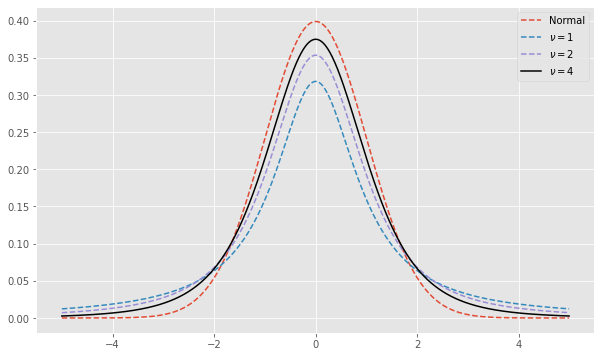

In [36]:

mu = 0
variance = 1
sigma = math.sqrt(variance)

# Create the curve from -5σ to 5σ
x = np.arange(mu - 5*sigma, mu + 5*sigma, 0.01)
y0 = norm.pdf(x, mu, sigma)
y1 = t.pdf(x, 1)
y2 = t.pdf(x, 2)
y4 = t.pdf(x, 4)


ax = sns.lineplot(x=x, y=y0, linestyle='--', label='Normal')
ax = sns.lineplot(x=x, y=y1, linestyle='--',label=r'$\nu=1$')
ax = sns.lineplot(x=x, y=y2, linestyle='--',label=r'$\nu=2$')
ax = sns.lineplot(x=x, y=y4, color='k',label=r'$\nu=4$')

The fatter tails account for the additional uncertanty introduced by estimating $\sigma$ by $s=\sqrt{\frac{1}{n-1}\sum_{{i=1}}^{n}(x_i - \bar{x})}$.

Using the **t-test** in place of the z-test is only necessary for small samples: $n \neq{20}$ (say).

In that case it is also better to replace the confidence interval $\bar{x} \pm zSE$ by

$$\bar{x} \pm t_{n-1}SE$$